In [1]:
!pip install yfinance


     ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
     --------- ------------------------------ 0.7/2.9 MB 14.2 MB/s eta 0:00:01
     ---------------- ----------------------- 1.2/2.9 MB 13.1 MB/s eta 0:00:01
     ------------------------ --------------- 1.8/2.9 MB 12.7 MB/s eta 0:00:01
     -------------------------------- ------- 2.4/2.9 MB 12.5 MB/s eta 0:00:01
     ---------------------------------------  2.9/2.9 MB 12.5 MB/s eta 0:00:01
     ---------------------------------------- 2.9/2.9 MB 11.7 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/112.2 kB ? eta -:--:--
     -------------------------------------- 112.2/11

In [4]:
!pip install pandas
!pip install pandas_datareader
import pandas_datareader as web
import pandas as pd
import yfinance as yf
import numpy as np
from datetime import datetime as dt
import scipy.stats as st
import matplotlib.pyplot as plt

     ---------------------------------------- 0.0/109.5 kB ? eta -:--:--
     ------------- ----------------------- 41.0/109.5 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 109.5/109.5 kB 1.6 MB/s eta 0:00:00


In [5]:
#Create our portfolio of equities
tickers=["ROUTE.NS","TREEHOUSE.NS"]

#Set the number of shares bought of each stock (arbitarary selection)
stocks=np.array([150,150])



In [6]:
#Download the closing prices
df=pd.DataFrame()
for i in tickers:
    tick=yf.Ticker(i)
    old=tick.history(start="2020-11-02", end="2023-10-26")['Close']
    new=pd.DataFrame(old)
    df[i]=new
    

In [7]:
# Calculate the initial invested value (Assuming we invested our money today)
initial_investment=stocks*df.iloc[-1,:]

In [8]:
#Calculate the returns
returns = df.pct_change()
#Extract the correlation matrix
corr_matrix=returns.corr()
#Get the standard deviation of the returns
st_dev=returns.std()

#Declare the confidence and Total Value at Risk Variables
conf=[]
tot_vaRlist=[]


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_28688\4222342173.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  returns = df.pct_change()


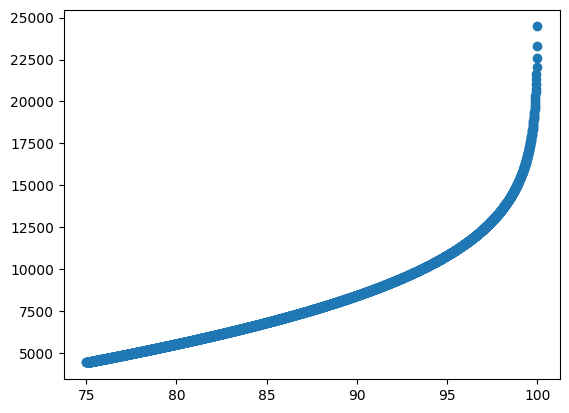

In [9]:
#Run the simulation for calculating VaR for different confidence intervals and get the list of Total VaR for all values(We took confidence intervals ranging from 75 to 100 with a step of .01)
for i in range(0,2500):
  conf+=[75+i/100]
  vaR=st.norm.ppf(conf[i]/100)*st_dev*initial_investment*-1
  vaRlist=np.array(vaR)
  tot_vaR_sq=np.matmul( np.matmul(vaRlist,corr_matrix.to_numpy()) , np.transpose(vaRlist))
  tot_vaR=np.sqrt(tot_vaR_sq)
  tot_vaRlist+=[tot_vaR]

#Plot the VaR against the different confidence intervals
plt.scatter(conf, tot_vaRlist)
plt.show()